# Simple Linear Regression

In [58]:
#Step1:importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
# For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation

In [59]:
#Step:2 Import the Data-Set
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [74]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     66.19
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           2.84e-05
Time:                        12:13:25   Log-Likelihood:                -25.269
No. Observations:                  10   AIC:                             56.54
Df Residuals:                       7   BIC:                             57.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.4649     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [75]:
#Step:3 Create a Linear Regression Model
model=LinearRegression()
#Step:4 Train the model
model.fit(X,Y)


LinearRegression()

In [76]:
#Step:5 Get the values Of slope (m) and intercept (c) from the trained model
intercept = model.intercept_
coefficients = model.coef_
 
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")
m= model.coef_[0]
print("Slope (m):", m)  # m value

Intercept: 26.461232374246418
Coefficients: [4.53264542]
Slope (m): 4.532645418619329


In [77]:
#Step:6 Equation of Line
print(f"Equation of Line: Y = {m:.2f}X + {intercept:.2f}")

Equation of Line: Y = 4.53X + 26.46


# Model Evaluation Metrics

In [78]:

#Step 7:make  predictions using the model
Y_pre=model.predict(X)
# print(X)
# print(Y)
# Y_pre
#Step 8: Evaluate the Model
# 1. Mean Squared Error (MSE) Measures average squared difference between actual and predicted values
mse=mean_squared_error(Y,Y_pre)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 13.10


In [79]:
# 2. Mean Absolute Error (MAE) Measures average absolute difference between actual and predicted values
mae=mean_absolute_error(Y,Y_pre)
print(f"Mean Absolute Error:{mae:.2f}")

Mean Absolute Error:2.88


In [80]:
# 3. Root Mean Squared Error (RJMSE) Measures standard deviation of residuals (errors)
rme=root_mean_squared_error(Y,Y_pre)
print(f"Root Mean Squared Error:{rme:.2f}")

Root Mean Squared Error:3.62


In [81]:
# 4. R-squared (R 2) Reprisents how well the model fits the data ( e to 1, where 1 is best)
r2score=r2_score(Y,Y_pre)
print(f"R^2 Score: {r2score:.2f}")

R^2 Score: 0.93


In [82]:
# 5. Adjusted R-squared (R2_adj) Adjusted for the number of predictors, better for multiple regression
n=len(Y)
p=1
adj_r2=1-((1-r2score)*(n-1)/(n-p-1))
print(f"Adjusted R^2 :{adj_r2:.2f}")



Adjusted R^2 :0.92


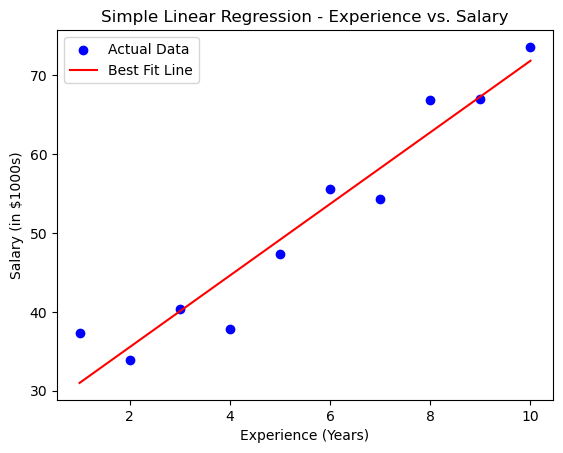

In [83]:
#Step 8: Plot the actual data points
plt.scatter(X,Y,color='blue',label='Actual Data')

#Step 9:Plot the Regression Line(Best Fit LIne)
plt.plot(X,Y_pre,color='red',label='Best Fit Line')#Regression line


# Step 10: Add labels and legend
plt.xlabel('Experience (Years)')  # Label for X-axis
plt.ylabel('Salary (in $1000s)')   # Label for Y-axis
plt.title('Simple Linear Regression - Experience vs. Salary')  # Title of the plot
plt.legend()  # Show legend

# Step 11: Display the graph
plt.show()  # Show the plotted graph

In [84]:
#User can input Experience and the model can predict the salary
while True:
    try:
        exp=float(input("\nEnter the experience or(-1 to exit):"))
        if exp==-1:
            break
        predicted_sal=model.predict(np.array([[exp]]))[0]
        print(f'Predicted Salary for {exp} years of Experience: ${predicted_sal:.2f}')
    except ValueError:
        print('Enter the valid number')
        


Enter the experience or(-1 to exit):
Enter the valid number

Enter the experience or(-1 to exit):-1
